In this blog, I will present the method for automatised search of the key parameters for (S)ARIMA forecasting models. 

This method could take a lot of time, but it can pay off because when you find the best parameter of your forecasting model, than it will save the time and raise the precision of your predictions. Also, manual trying could take you the most time, but this method could be helpful in some situation, having in mind that understanding why we should use exact parameters in forecasting model could be of crucial importance for better understanding the business problem. Nevertheless, this approach could fasten you exploration time and help you to get better understanding of your problem.

The hyperparameter we will tune in forecasting model of (S)ARIMA are seasonality paremeter (S), autoregression parameter (AR), differencing parameter (I) and moving average (MA). You can read more about this parameters in my previous blog (link) if needed.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
co2 = [315.58, 316.39, 316.79, 317.82, 318.39, 318.22, 316.68, 315.01, 314.02, 313.55,
       315.02, 315.75, 316.52, 317.10, 317.79, 319.22, 320.08, 319.70, 318.27, 315.99,
       314.24, 314.05, 315.05, 316.23, 316.92, 317.76, 318.54, 319.49, 320.64, 319.85,
       318.70, 316.96, 315.17, 315.47, 316.19, 317.17, 318.12, 318.72, 319.79, 320.68,
       321.28, 320.89, 319.79, 317.56, 316.46, 315.59, 316.85, 317.87, 318.87, 319.25,
       320.13, 321.49, 322.34, 321.62, 319.85, 317.87, 316.36, 316.24, 317.13, 318.46,
       319.57, 320.23, 320.89, 321.54, 322.20, 321.90, 320.42, 318.60, 316.73, 317.15,
       317.94, 318.91, 319.73, 320.78, 321.23, 322.49, 322.59, 322.35, 321.61, 319.24,
       318.23, 317.76, 319.36, 319.50, 320.35, 321.40, 322.22, 323.45, 323.80, 323.50,
       322.16, 320.09, 318.26, 317.66, 319.47, 320.70, 322.06, 322.23, 322.78, 324.10,
       324.63, 323.79, 322.34, 320.73, 319.00, 318.99, 320.41, 321.68, 322.30, 322.89,
       323.59, 324.65, 325.30, 325.15, 323.88, 321.80, 319.99, 319.86, 320.88, 322.36,
       323.59, 324.23, 325.34, 326.33, 327.03, 326.24, 325.39, 323.16, 321.87, 321.31,
       322.34, 323.74, 324.61, 325.58, 326.55, 327.81, 327.82, 327.53, 326.29, 324.66,
       323.12, 323.09, 324.01, 325.10, 326.12, 326.62, 327.16, 327.94, 329.15, 328.79,
       327.53, 325.65, 323.60, 323.78, 325.13, 326.26, 326.93, 327.84, 327.96, 329.93,
       330.25, 329.24, 328.13, 326.42, 324.97, 325.29, 326.56, 327.73, 328.73, 329.70,
       330.46, 331.70, 332.66, 332.22, 331.02, 329.39, 327.58, 327.27, 328.30, 328.81,
       329.44, 330.89, 331.62, 332.85, 333.29, 332.44, 331.35, 329.58, 327.58, 327.55,
       328.56, 329.73, 330.45, 330.98, 331.63, 332.88, 333.63, 333.53, 331.90, 330.08,
       328.59, 328.31, 329.44, 330.64, 331.62, 332.45, 333.36, 334.46, 334.84, 334.29,
       333.04, 330.88, 329.23, 328.83, 330.18, 331.50, 332.80, 333.22, 334.54, 335.82,
       336.45, 335.97, 334.65, 332.40, 331.28, 330.73, 332.05, 333.54, 334.65, 335.06,
       336.32, 337.39, 337.66, 337.56, 336.24, 334.39, 332.43, 332.22, 333.61, 334.78,
       335.88, 336.43, 337.61, 338.53, 339.06, 338.92, 337.39, 335.72, 333.64, 333.65,
       335.07, 336.53, 337.82, 338.19, 339.89, 340.56, 341.22, 340.92, 339.26, 337.27,
       335.66, 335.54, 336.71, 337.79, 338.79, 340.06, 340.93, 342.02, 342.65, 341.80,
       340.01, 337.94, 336.17, 336.28, 337.76, 339.05, 340.18, 341.04, 342.16, 343.01,
       343.64, 342.91, 341.72, 339.52, 337.75, 337.68, 339.14, 340.37, 341.32, 342.45,
       343.05, 344.91, 345.77, 345.30, 343.98, 342.41, 339.89, 340.03, 341.19, 342.87,
       343.74, 344.55, 345.28, 347.00, 347.37, 346.74, 345.36, 343.19, 340.97, 341.20,
       342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
       342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
       347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
       351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]
co2 = pd.Series(co2, index=pd.date_range('1-1-1959', periods=len(co2), freq='M'), name = 'CO2')

We will check and plot trend and seasonality of the timeseries about CO2 emission in last 50 years and we see increasing trend and clear seasonal pattern due to the heating periods in the winter. 

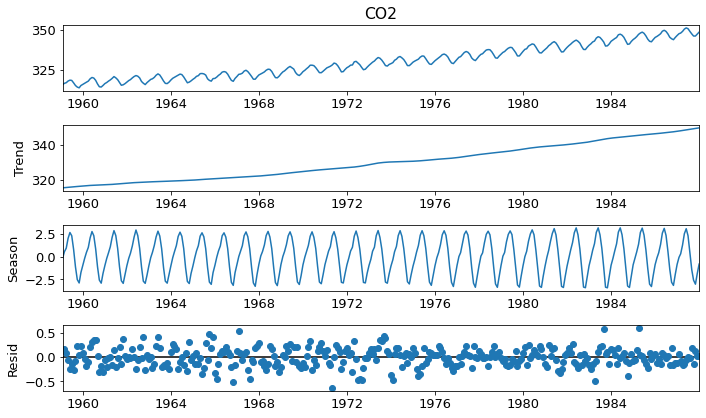

In [3]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(co2, seasonal=7)
res = stl.fit()
fig = res.plot()

In [4]:
def test_stationarity(timeseries, rolling=12):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Power consumption Old data')
    plt.xlabel('Time - periods(30s)')
    plt.ylabel('Power consumption in Watts')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The timeseries is stationary at 95% level of confidence')
    else:
        print('The timeseries is not stationary at 95% level of confidence')

In [5]:
co2

1959-01-31    315.58
1959-02-28    316.39
1959-03-31    316.79
1959-04-30    317.82
1959-05-31    318.39
               ...  
1987-08-31    347.54
1987-09-30    346.20
1987-10-31    346.20
1987-11-30    347.44
1987-12-31    348.67
Freq: M, Name: CO2, Length: 348, dtype: float64

After differencing the timeseries, it becomes stationary.

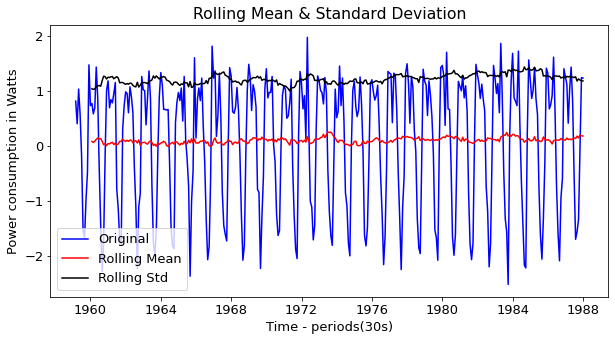

Results of Dickey-Fuller Test:
Test Statistic                  -4.688213
p-value                          0.000089
#Lags Used                      12.000000
Number of Observations Used    334.000000
Critical Value (1%)             -3.450081
Critical Value (5%)             -2.870233
Critical Value (10%)            -2.571401
dtype: float64
The timeseries is stationary at 95% level of confidence


In [6]:
co2_diff = co2 - co2.shift(1)
co2_diff = co2_diff.dropna()
test_stationarity(co2_diff, rolling=12)

Before we go to the autoarima search, we will check the correlogram to see how residuals are correlated across lags.

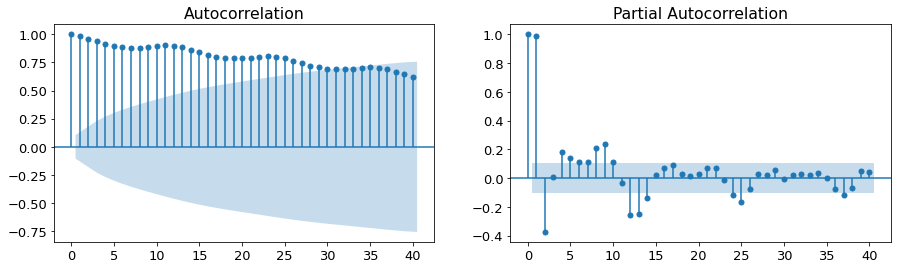

In [7]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(co2, 
                               lags=40, 
                               ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(co2, 
                                lags=40, 
                                ax=axes[1])

With this code, we have created several combinations of p (AR), d(I) and q(MA) parameter. In order to relax the search, we defined the seasonal (s) parameter to 12 as we are sure there is yearly pattern. For evaluating the goodness of the model we use Akaike information criteria (aic). This criteria is crucial for statistical model of some data, by calculating the difference of the k -  the number of estimated parameters in the model and L be the maximum value of the likelihood function for the model. This means that the model with best AIC will have the optimimum value of likelihood and the smallest possible number of the parameters, thus enabling simplicity and efficiency of the model (parsimony) which leads to the optimal performance. The AIC value of the model is the following:

$
AIC = 2k - 2ln(L)
$


In [8]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search
p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
p2 = d2 = q2 = range(0, 2) # second set of p's, d's, and q's for seasonal parameters
pdq2 = list(itertools.product(p2,d2,q2)) # simular to code above but for seasonal parameters
s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []
# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(co2, order=combination, seasonal_order=seasonal_combination,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            model = model.fit(disp=False)
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)
            
        except:
            continue
            
best_aic = min(aics)

Now we can see what hyperparameters for forecasting will give the best predictions. 

In [9]:
print('best aic is: ', round(best_aic, 3))
print(40*'==')
print ('ARIMA parameters: ', '\n', 'AR: ', combs[best_aic][0][0], '\n', 'I: ',combs[best_aic][0][1], '\n', 'MA: ',combs[best_aic][0][2])
print('Seasonal parameters:', combs[best_aic][1])

best aic is:  138.302
ARIMA parameters:  
 AR:  2 
 I:  1 
 MA:  1
Seasonal parameters: (0, 1, 1, 12)


In [10]:
combs[best_aic]

[(2, 1, 1), (0, 1, 1, 12)]

Congratulations! With this hyperparameters, we can do a train test split and make a predictions for a test set and than compare the predictions and test results. 

In [11]:
def train_test_split(timeseries, lags_for_prediction=12):
    split=len(timeseries)-lags_for_prediction
    train=timeseries[:split]
    test=timeseries[split:]
    return train, test

In [12]:
train_series, test_series = train_test_split(co2, 12)

In [13]:
def forecasting (p,d,q, season, lags_for_forecast, train_series):

    model = sm.tsa.statespace.SARIMAX(train_series, order=(p,d,q), seasonal_order=(p,d,q,season),
                                             simple_differencing=0, #if True  time series provided as endog is literally differenced and an ARMA model is fit to the resulting new time series
                                             enforce_stationarity=True,
                                             enforce_invertibility=False)
    fitted = model.fit(disp=-1)  

    # Forecast
    forecast = fitted.forecast(lags_for_forecast)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train_series, color='blue', label='train')
    plt.plot(test_series, color='green', label='test', alpha=0.6)
    plt.plot(forecast, color='red', label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    RSS=np.sqrt(sum(forecast.values-test_series.values.reshape(-1))**2)/lags_for_forecast
    print("\n", '\033[1m' +'Root Squared Error (RSS) of SARIMAX model(p,d,q)(p,d,q,s)' + '\033[0m',(p,d,q),season,':', round(RSS, 3),"\n")
    print(fitted.summary())

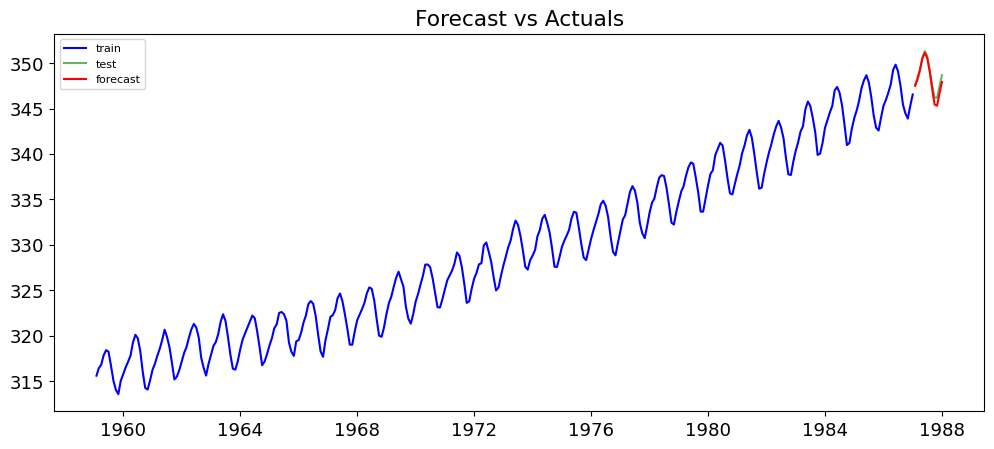


 Root Squared Error (RSS) of SARIMAX model(p,d,q)(p,d,q,s) (2, 1, 1) 12 : 0.313 

                                     SARIMAX Results                                      
Dep. Variable:                                CO2   No. Observations:                  336
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -66.971
Date:                            Fri, 04 Feb 2022   AIC                            147.942
Time:                                    15:34:18   BIC                            174.386
Sample:                                01-31-1959   HQIC                           158.498
                                     - 12-31-1986                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1802      0.88

In [14]:
forecasting (2,1,1, 12, 12, train_series)